# CSE 6367 Programming Assignment 2 (P2)

## Spring 2024
## Due: 11:59pm Central Time, Friday, February 23, 2023

### Task 1 (40 points)

Import the "cameraman.jpeg" image and apply

<img src = Images/cameraman.jpeg style="width:300px;height:300px">

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector

d) Edge detection using difference of Gaussians (DoG)
    
Note:
1. You can't use opencv or any other library function to detect edges
2. Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot.


In [93]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Reading the image
img = cv2.imread('cameraman.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

image = np.float32(img)


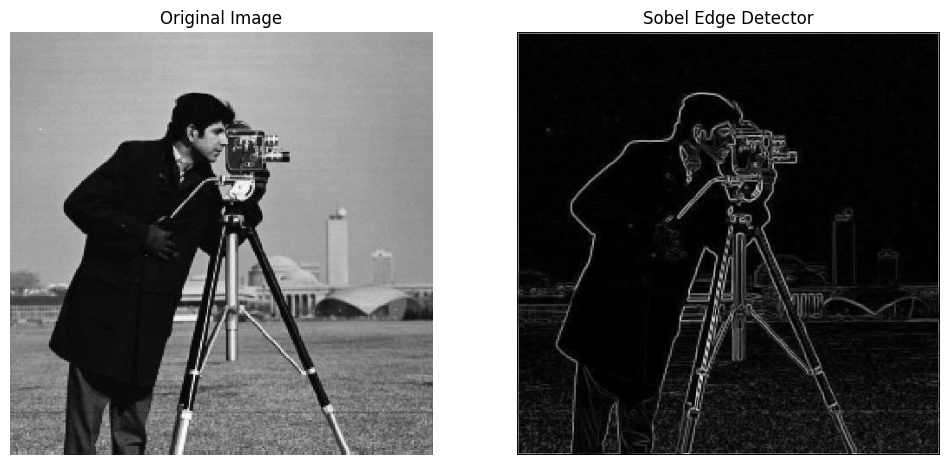

In [94]:
#Sobel filter
def apply_filter(kernel_x, kernel_y, image, sigma=1):


    # Initialize the filtered image
    filtered_image_x = [[0] * len(image[0]) for _ in range(len(image))]
    filtered_image_y = [[0] * len(image[0]) for _ in range(len(image))]

    # Apply the kernels
    for i in range(1, len(image) - 1):
        for j in range(1, len(image[0]) - 1):
            # Compute the gradient in the x-direction
            gx = (kernel_x[0][0] * image[i - 1][j - 1] + kernel_x[0][1] * image[i - 1][j] + kernel_x[0][2] * image[i - 1][j + 1] +
                  kernel_x[1][0] * image[i][j - 1] + kernel_x[1][1] * image[i][j] + kernel_x[1][2] * image[i][j + 1] +
                  kernel_x[2][0] * image[i + 1][j - 1] + kernel_x[2][1] * image[i + 1][j] + kernel_x[2][2] * image[i + 1][j + 1])

            # Compute the gradient in the y-direction
            gy = (kernel_y[0][0] * image[i - 1][j - 1] + kernel_y[0][1] * image[i - 1][j] + kernel_y[0][2] * image[i - 1][j + 1] +
                  kernel_y[1][0] * image[i][j - 1] + kernel_y[1][1] * image[i][j] + kernel_y[1][2] * image[i][j + 1] +
                  kernel_y[2][0] * image[i + 1][j - 1] + kernel_y[2][1] * image[i + 1][j] + kernel_y[2][2] * image[i + 1][j + 1])

            # Compute the magnitude of the gradient
            #gradient_magnitude = int((gx ** 2 + gy ** 2) ** 0.5)

            # Store the result in the filtered image
            filtered_image_x[i][j] = gx
            filtered_image_y[i][j] = gy

    return filtered_image_x, filtered_image_y

# Define the Sobel kernels
sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# Add padding to the image
pad_size = 1
padded_image = np.zeros((image.shape[0] + 2*pad_size, image.shape[1] + 2*pad_size))
padded_image[pad_size:-pad_size, pad_size:-pad_size] = image

# Apply the Sobel filter
filtered_image_x, filtered_image_y = apply_filter(sobel_x, sobel_y, padded_image)

#Calculating Sobel gradient
sobel_gradient_magnitude = np.sqrt(np.square(filtered_image_x) + np.square(filtered_image_y))


# Display the original image and the filtered image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(sobel_gradient_magnitude,cmap = 'gray')
axs[1].set_title('Sobel Edge Detector')
axs[1].axis('off')
plt.show()

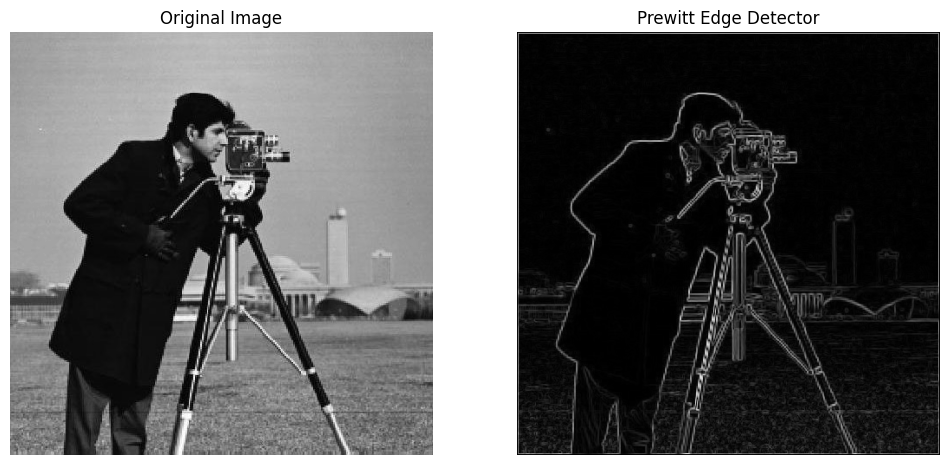

In [95]:
# Define the Prewitt kernels
prewitt_x =  np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Apply the Sobel filter
filtered_image_x, filtered_image_y = apply_filter(prewitt_x,prewitt_y, padded_image)

#Calculating Prewitt Gradient
prewitt_gradient_magnitude = np.sqrt(np.square(filtered_image_x) + np.square(filtered_image_y))

# Display the original image and the filtered image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(prewitt_gradient_magnitude,cmap = 'gray')
axs[1].set_title('Prewitt Edge Detector')
axs[1].axis('off')
plt.show()

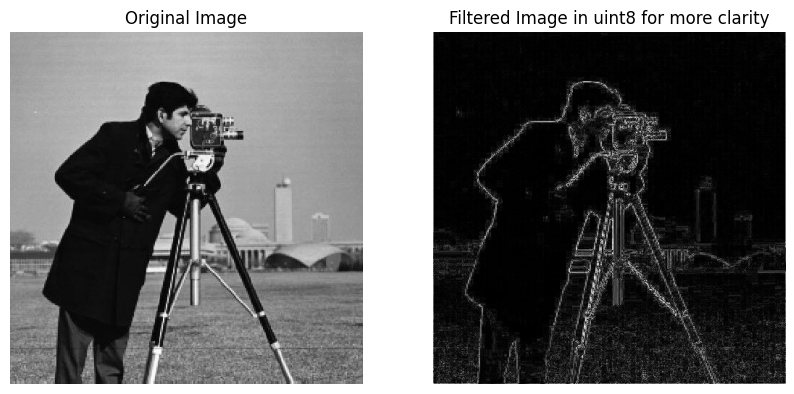

In [96]:
def laplacian_edge_detector(image):
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Apply the Laplacian kernel
    filtered_image = np.zeros_like(image, dtype=np.float32)
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            patch = padded_image[i - 1:i + 2, j - 1:j + 2]
            filtered_image[i - 1, j - 1] = np.sum(patch * laplacian_kernel)

    return np.uint8(np.absolute(filtered_image))

# Apply the Laplacian edge detector
filtered_image = laplacian_edge_detector(image)

# Display the original image and the filtered image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(filtered_image,cmap = 'gray')
axs[1].set_title('Filtered Image in uint8 for more clarity')
axs[1].axis('off')
plt.show()


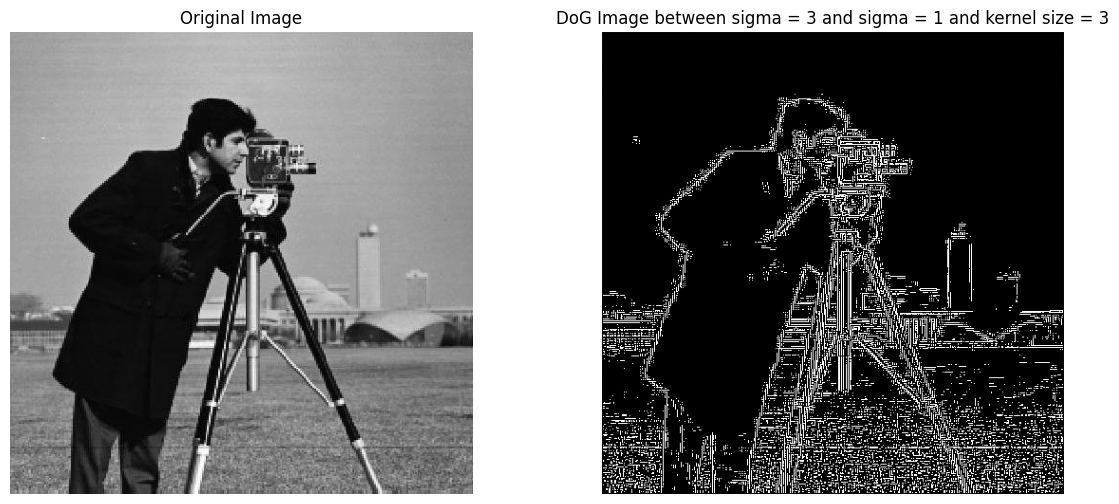

In [97]:
#d) Edge detection using difference of Gaussians (DoG)

def gaussian_kernel(size, sigma=1):

    size = (int(size) + 1) // 2
    x, y, z = np.mgrid[-size:size+1, -size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


# Define the Gaussian kernels
sigma1 = 1
sigma2 = 9
kernel_size = 3

# Create the Gaussian kernels
kernel1 = np.zeros((kernel_size, kernel_size))
kernel2 = np.zeros((kernel_size, kernel_size))
center = (kernel_size) // 2
for i in range(kernel_size):
    for j in range(kernel_size):
        kernel1[i, j] = np.exp(-((i - center) ** 2 + (j - center) ** 2) / (2 * sigma1 ** 2))
        kernel2[i, j] = np.exp(-((i - center) ** 2 + (j - center) ** 2) / (2 * sigma2 ** 2))

# Normalize the kernels
kernel1 /= np.sum(kernel1)
kernel2 /= np.sum(kernel2)

# Apply the Gaussian kernels
filtered_image1 = np.zeros_like(image, dtype=np.float32)
filtered_image2 = np.zeros_like(image, dtype=np.float32)

# Add padding to the image
pad_size = 1
padded_image = np.zeros((image.shape[0] + 2*pad_size, image.shape[1] + 2*pad_size))
padded_image[pad_size:-pad_size, pad_size:-pad_size] = image

for i in range(center, padded_image.shape[0] - center):
    for j in range(center, padded_image.shape[1] - center):
        patch = padded_image[i - center:i + center + 1, j - center:j + center + 1]
        filtered_image1[i - center, j - center] = np.sum(patch * kernel1)
        filtered_image2[i - center, j - center] = np.sum(patch * kernel2)

# Compute the Difference of Gaussians (DoG)
dog_image = np.uint8(np.absolute(filtered_image1)- np.absolute(filtered_image2))


# Display the original image and the DoG image
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(dog_image, cmap='gray')
axs[1].set_title('DoG Image between sigma = 3 and sigma = 1 and kernel size = 3')
axs[1].axis('off')
plt.show()

### Task 2 (30 points)

<img src = Images/cameraman.jpeg style="width:300px;height:300px">

The Canny edge detector is an edge detection algorithm with multiple steps. The steps in the Canny edge detector are listed below:

    - Smooth the image to remove the noise (Gaussian filter)
    - Find the gradients of the image
    - Apply non-maximum suppression
    - Apply double threshold. Select edge pixels by hysteresis (suppress all edges that are weak and not connected to strong edges).

Implement "Canny Edge Detector" from scratch using the steps above (for each step above, you can use library functions) and compare your result on "cameraman.jpeg" image with OpenCV implementation of "Canny Edge Detector" (https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

In [98]:
#Smooth the image to remove the noise
blur_img = cv2.GaussianBlur(image, (5,5), 0) #Used this function as  (for each step above, you can use library functions)  is mentioned above
blur_img = np.float32(blur_img)

In [99]:
# Sobel gradients
gx = cv2.Sobel(blur_img, cv2.CV_64F, 1, 0, ksize=3) #Used this function as  (for each step above, you can use library functions)  is mentioned above
gy = cv2.Sobel(blur_img, cv2.CV_64F, 0, 1, ksize=3) #Used this function as  (for each step above, you can use library functions)  is mentioned above

G = np.hypot(gx, gy)

#G = G / G.max() * 255

theta = np.arctan2(gy, gx)

In [100]:
#Apply non-maximum suppression
M, N = G.shape
Z = np.zeros((M,N), dtype=np.int32)
angle = theta * 180. / np.pi    # max -> 180, min -> -180
angle[angle < 0] += 180         # max -> 180, min -> 0

for i in range(1,M-1):
    for j in range(1,N-1):
        q = 255
        r = 255

        #angle 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            r = G[i, j-1]
            q = G[i, j+1]
        #angle 45
        elif (22.5 <= angle[i,j] < 67.5):
            r = G[i-1, j+1]
            q = G[i+1, j-1]
        #angle 90
        elif (67.5 <= angle[i,j] < 112.5):
            r = G[i-1, j]
            q = G[i+1, j]
        #angle 135
        elif (112.5 <= angle[i,j] < 157.5):
            r = G[i+1, j+1]
            q = G[i-1, j-1]

        if (G[i,j] >= q) and (G[i,j] >= r):
            Z[i,j] = G[i,j]
        else:
            Z[i,j] = 0



In [116]:
#Apply double threshold.
def threshold(img, lowThresholdRatio=0.10, highThresholdRatio=0.20):

    #Using two thresholds low and high thresholds to categorize strong, weak and non-edges
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)
    #Any edges with intensity gradient more than highThreshold are sure to be edges and those below lowThreshold are sure to be non-edges, so discarded automatically
    #Wweak edges are considered to be edges if they are connected to strong edges
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)


    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)
thresholded = threshold(Z,0.6)[0]

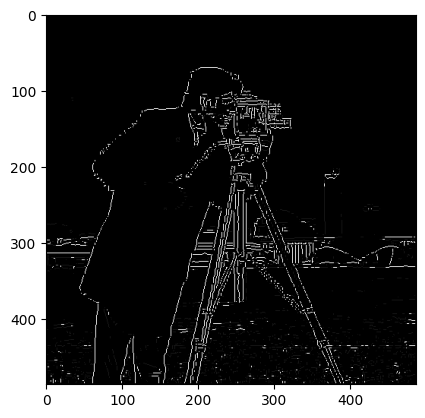

In [117]:
#Select edge pixels by hysteresis (suppress all edges that are weak and not connected to strong edges).

def hysteresis(img, weak=60, strong=255):
#Weak edges are considered to be edges if they are connected to strong edges.
    M, N = img.shape
    #Checking the strong edges near(adjacent) to the weak edges
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i, j] == weak):
                if (
                    (img[i+1, j-1] == strong) or (img[i+1, j] == strong) or
                    (img[i+1, j+1] == strong) or (img[i, j-1] == strong) or
                    (img[i, j+1] == strong) or (img[i-1, j-1] == strong) or
                    (img[i-1, j] == strong) or (img[i-1, j+1] == strong)
                ):
                    img[i, j] = strong
                else:
                    img[i, j] = 0
    return img
plt.imshow(hysteresis(thresholded),cmap= 'gray')

### Task 3 (30 points)

Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.

Note: You can't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/lines.jpg>

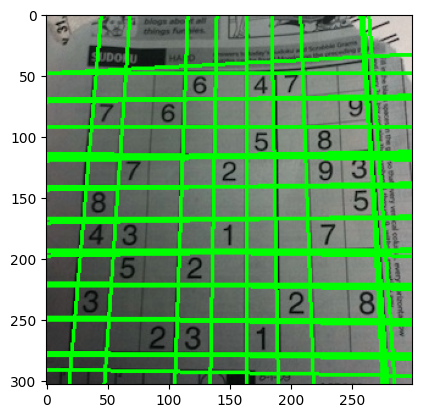

In [103]:
def custom_canny(image, low_threshold, high_threshold, aperture_size=5):

    # Step 1: Apply Gaussian blur to the image as mentioned above with 5 * 5 filter
    blurred_image = cv2.GaussianBlur(image, (aperture_size, aperture_size), 0)
    blurred_image = np.float32(blurred_image)
    # Step 2: Compute gradients using Sobel operators
    gradient_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=aperture_size)
    gradient_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=aperture_size)

    # Step 3: Compute gradient magnitude and direction
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Step 4: Non-maximum suppression
    suppressed_gradient = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[i, j] * 180 / np.pi
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                if (gradient_magnitude[i, j] > gradient_magnitude[i, j + 1]) and (gradient_magnitude[i, j] > gradient_magnitude[i, j - 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (22.5 <= angle < 67.5):
                if (gradient_magnitude[i, j] > gradient_magnitude[i - 1, j + 1]) and (gradient_magnitude[i, j] > gradient_magnitude[i + 1, j - 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (67.5 <= angle < 112.5):
                if (gradient_magnitude[i, j] > gradient_magnitude[i - 1, j]) and (gradient_magnitude[i, j] > gradient_magnitude[i + 1, j]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (112.5 <= angle < 157.5):
                if (gradient_magnitude[i, j] > gradient_magnitude[i - 1, j - 1]) and (gradient_magnitude[i, j] > gradient_magnitude[i + 1,j + 1]):
                    suppressed_gradient[i,j]=gradient_magnitude[i,j]

    # Step 5: Double thresholding and edge tracking by hysterisis
    #Edges are strong if they have image intensity gradient greater than high threshold and no edges are those with
    #image intensity less than low threshold
    strong_edges = suppressed_gradient > high_threshold
    weak_edges = (suppressed_gradient >= low_threshold) & (suppressed_gradient <= high_threshold)
    #Remaining edges are strong if they are connected to strong edges
    final_edges = np.zeros_like(suppressed_gradient)

    final_edges[strong_edges] = 255
    for i in range(1,suppressed_gradient.shape[0]-1):
        for j in range(1,suppressed_gradient.shape[1]-1):
            if weak_edges[i,j]:
                if np.any(strong_edges[i-1:i+2,j-1:j+2]):
                    final_edges[i,j]=255

    return final_edges.astype(np.uint8)


def hough_lines_manual(edges, rho_resolution=1, theta_resolution=np.pi/180, threshold=150):
    # Calculate the Hough accumulator dimensions rho and theta space
    max_rho = int(np.sqrt((edges.shape[0])**2 + (edges.shape[1])**2))
    max_theta = int(np.pi / theta_resolution)

    # Initialize the Hough accumulator array
    accumulator = np.zeros((2 * max_rho+1, max_theta))

    # Calculating the sin and cos values for the range of thetas
    theta_values = np.arange(0, max_theta) * theta_resolution
    cos_t = np.cos(theta_values)
    sin_t = np.sin(theta_values)

    # Find the edge (non-zero) pixel indices
    y_idxs, x_idxs = np.nonzero(edges)

    # Hough Transform: Vote in the accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(max_theta):
            # Calculate the rho value for each theta
            rho = int(round(x * cos_t[t_idx] + y * sin_t[t_idx]) / rho_resolution)+max_rho
            accumulator[rho, t_idx] += 1

    # Find the coordinates of the accumulator peaks
    lines = []
    for rho in range(accumulator.shape[0]):
        for theta in range(accumulator.shape[1]):
            if accumulator[rho, theta] >= threshold:
                rho -= max_rho
                lines.append((rho, theta * theta_resolution))

    return lines

# Read the input image and convert to grayscale
img = cv2.imread('lines.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Performed custom implementation of Canny Detection
edges = custom_canny(gray_image, low_threshold=5, high_threshold=50)

#Performed custom implementation of Hough lines transformation
detected_lines = hough_lines_manual(edges, threshold =80)

# Draw the detected lines on the original image
resultant_image = img.copy()
for rho, theta in detected_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    #Draws line at co-ordinates mentioned in green color
    cv2.line(resultant_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

#Plotting the resultant image
plt.imshow(resultant_image)

**References**:
https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape
https://www.youtube.com/watch?v=gbL3XKOiBvw
https://alyssaq.github.io/2014/understanding-hough-transform/
https://www.youtube.com/watch?v=M43yXpp2qW8
https://stackoverflow.com/questions/57773434/draw-hough-transform-lines-over-an-image
https://www.adeveloperdiary.com/data-science/computer-vision/
https://medium.com/@rohit-krishna/coding-canny-edge-detection-algorithm-from-scratch-in-python-232e1fdceac7how-to-implement-sobel-edge-detection-using-python-from-scratch/
https://towardsdatascience.com/lines-detection-with-hough-transform-84020b3b1549

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
